In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [4]:
def load_dataset(file_p):
    custom_ds = pd.read_csv(file_p)
    return custom_ds

dataset = load_dataset("googleplaystore.csv")
dataset


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
def print_summarize_dataset(argv):
    print("Dataset summary: ",argv.describe(), '\n')
    print("First ten rows of the dataset: ",argv.head(10), '\n')
    print("Dataset shape: ",argv.shape, '\n')
    print("Info about dataset: ",argv.info(), '\n')
    
print_summarize_dataset(dataset)


Dataset summary:              Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000 

First ten rows of the dataset:                                                   App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART

In [6]:
def clean_dataset(input_df):
    cln_dset = input_df.copy()
    
    cln_dset.dropna(axis=0, inplace=True)
    cln_dset["Reviews"] = cln_dset["Reviews"].astype(int)
    cln_dset["Category"] = cln_dset["Category"].astype("string")
    cln_dset["Installs"] = cln_dset["Installs"].astype(str)
    cln_dset["Installs"] = cln_dset["Installs"].str.replace("[+,]", "", regex=True).astype(int)
    cln_dset["Last Updated"] = pd.to_datetime(cln_dset['Last Updated'])
    cln_dset["Genres"] = cln_dset["Genres"].str.replace("&", "and").astype("string")
    
    cln_dset["Size"] = cln_dset["Size"].astype(str)
    cln_dset["Size"] = cln_dset["Size"].str.replace("Varies with device", "NaN")
    
    size_data = cln_dset[cln_dset["Size"].str.contains("k", regex=False)]
    size_data["Size"] = size_data["Size"].str.replace("k", "").astype(float) / 1000
    
    cln_dset.loc[size_data.index, "Size"] = size_data["Size"]
    cln_dset["Size"] = cln_dset["Size"].str.replace("M", "").astype(float)
    cln_dset["Size"] = cln_dset["Size"].fillna(cln_dset["Size"].mean())
    
    cln_dset["Content Rating"] = cln_dset["Content Rating"].str.replace("+", "")
    
    return cln_dset
ready_set = clean_dataset(dataset)
ready_set

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0,Everyone,Art and Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0,Everyone,Art and Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0,Everyone,Art and Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0,Teen,Art and Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0,Everyone,Art and Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,23.746317,1000,Free,0,Mature 17,Books and Reference,2015-01-19,Varies with device,Varies with device


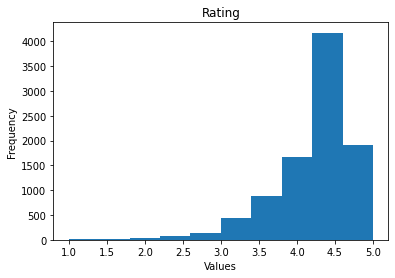

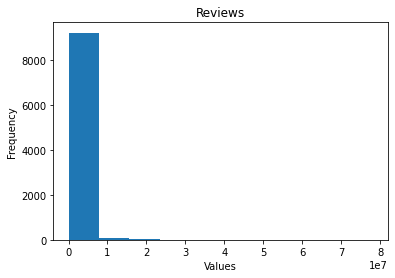

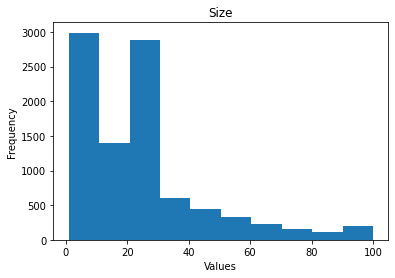

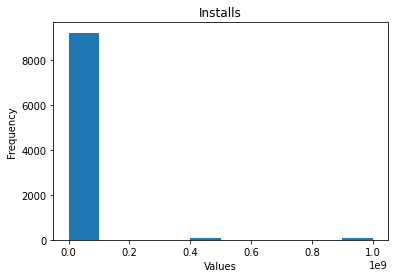

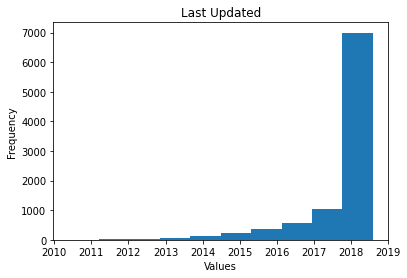

In [8]:
def print_histograms(init_data):
    modified_data = init_data.drop(["App", "Category", "Type", "Current Ver", "Android Ver", "Genres", "Content Rating", "Price"], axis=1)
    
    for col_n in modified_data.columns:
        plt.hist(modified_data[col_n])
        plt.title(col_n)
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.show()
        
print_histograms(ready_set)


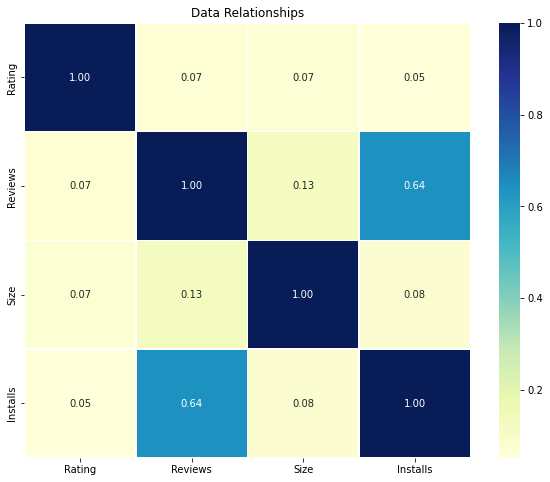

In [7]:
def compute_correlations_matrix(param_df):
    mod_df = param_df.drop(["App", "Type", "Category", "Genres", "Current Ver", "Android Ver", "Content Rating", "Price"], axis=1)
    cor_mtx = mod_df.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cor_mtx, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
    plt.title("Data Relationships")
    plt.show()
    
compute_correlations_matrix(ready_set)


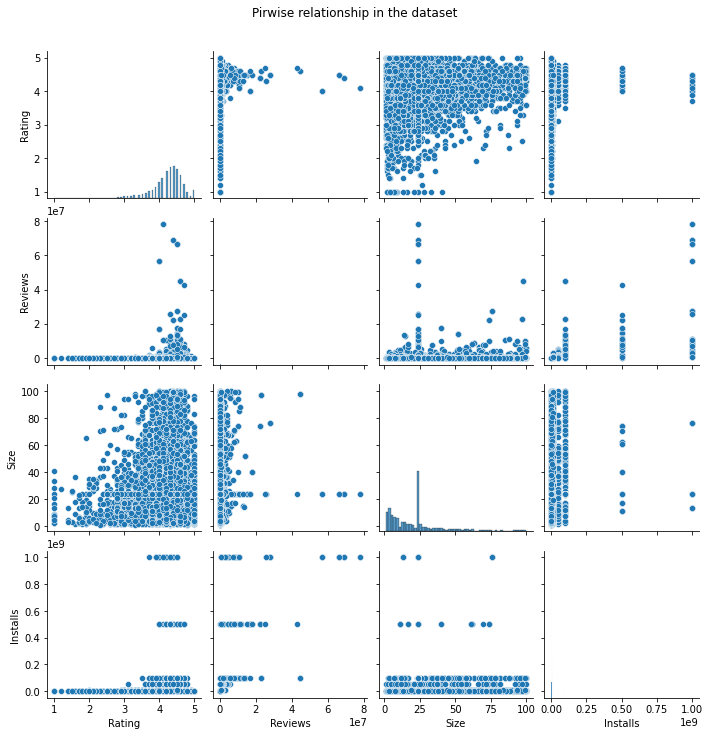

In [17]:
def print_scatter_matrix(ds):

    plot = sns.pairplot(ds)
    plot.fig.suptitle("Pirwise relationship in the dataset", y=1.02)
    plot.tight_layout()
    plt.show()

print_scatter_matrix(ready_set)

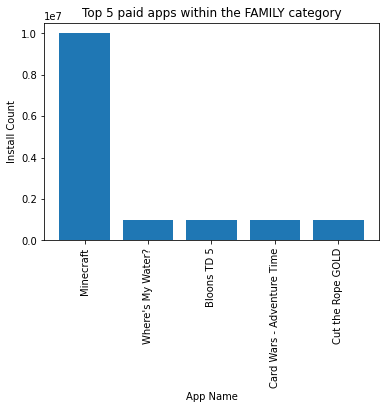

In [19]:
def plt_top_paid_fam_apps(app_data):
    fam_apps = app_data[(app_data['Category'] == 'FAMILY') & (app_data['Type'] == 'Paid')]
    
    sorted_by_instls = fam_apps.sort_values('Installs', ascending=False)
    selected_a = sorted_by_instls.head(6)
    
    plt.bar(selected_a['App'], selected_a['Installs'])
    plt.xlabel('App Name')
    plt.ylabel('Install Count')
    plt.title('Top 5 paid apps within the FAMILY category')
    
    plt.xticks(rotation=90)
    plt.show()
    
plt_top_paid_fam_apps(ready_set)

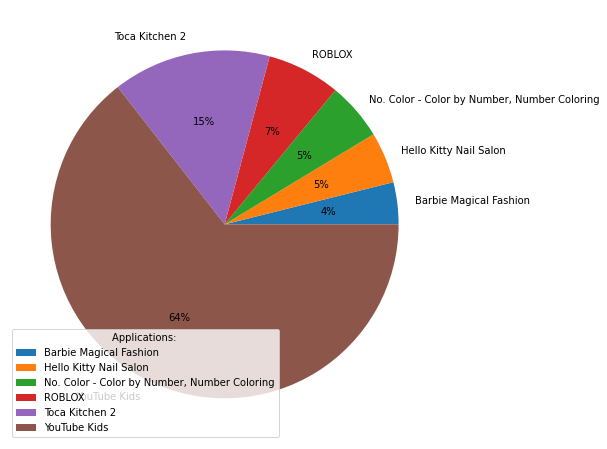

In [23]:
def plt_high_review_apps(review_data):
    fam_revs = review_data[review_data.Category == 'FAMILY']
    high_rev_apps = fam_revs[fam_revs.Reviews > np.mean(fam_revs.Reviews)]
    
    plt.figure(figsize=(10, 8))
    rev_values = high_rev_apps.Reviews.head(6).sort_values()
    app_names = high_rev_apps.App.head(6).sort_values()
    
    plt.pie(rev_values, labels=app_names, autopct='%.0f%%')
    plt.legend(title='Applications: ')
    plt.show()
    
plt_high_review_apps(ready_set)

In [25]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User tolbayev_m connection: OK


<MY_MOBAPP_STUDIO>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY MOBAPP STUDIO 

 Status             SUCCESS          
 Execution Runtime  6.964993         
 Score              [======] 6/6     


Checks detail Report:

 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUCCESS 



 TEST PRINT SCATTER MATRIX  SUCCESS 



 TEST PR